Loading the Dataset

In [50]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

In [51]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 50

In [52]:

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Images",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size =BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [53]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [54]:
len(dataset)


68

In [55]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch[0])  #output you get is a tensor
    #if you want to convert it into a numpy
    # print(image_batch[0].numpy()) -> will give you a 3D array


tf.Tensor(
[[[131. 119. 123.]
  [120. 108. 112.]
  [134. 122. 126.]
  ...
  [113. 101. 105.]
  [113. 101. 105.]
  [112. 100. 104.]]

 [[115. 103. 107.]
  [112. 100. 104.]
  [115. 103. 107.]
  ...
  [119. 107. 111.]
  [118. 106. 110.]
  [117. 105. 109.]]

 [[117. 105. 109.]
  [111.  99. 103.]
  [115. 103. 107.]
  ...
  [127. 115. 119.]
  [123. 111. 115.]
  [119. 107. 111.]]

 ...

 [[168. 159. 164.]
  [164. 155. 160.]
  [161. 152. 157.]
  ...
  [174. 165. 170.]
  [171. 162. 167.]
  [166. 157. 162.]]

 [[164. 155. 160.]
  [165. 156. 161.]
  [166. 157. 162.]
  ...
  [171. 162. 167.]
  [170. 161. 166.]
  [166. 157. 162.]]

 [[160. 151. 156.]
  [166. 157. 162.]
  [170. 161. 166.]
  ...
  [167. 158. 163.]
  [168. 159. 164.]
  [167. 158. 163.]]], shape=(256, 256, 3), dtype=float32)


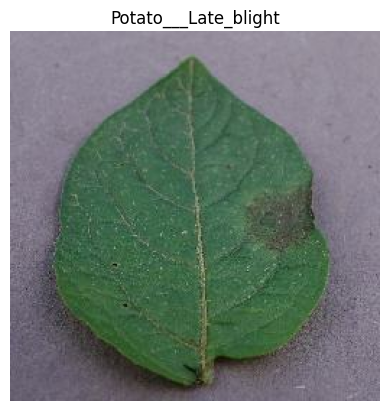

In [56]:
# Visualizing the Images
for image_batch,label_match in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")

In [57]:
# 80% ==> training 
# 20% ==> 10% validation ,10% test

In [58]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [59]:
train_ds = dataset.take(54)
len(train_ds)

54

In [60]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [61]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [62]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [63]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [64]:
# def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
#     ds_size = len(ds)

#     if shuffle:
#         ds=ds.shuffle(shuffle_size,seed=12)

#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)

#     train_ds=ds.take(train_size)

#     val_ds=ds.skip(train_size).take(val_size)
#     test_ds=ds.skip(train_size).take(val_size)

#     return train_ds,val_ds,test_ds

In [65]:
# train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [66]:
len(test_ds)

8

In [67]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

Preprocessing Part


In [68]:
# Rescaling
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [69]:
# Data Augmentation
data_augmentation = tf.keras.Sequential([ 
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [70]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation = "relu" , input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = "relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [71]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [72]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

Model Training

In [94]:
history = model.fit(
    train_ds,
    epochs=50,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
54/54 [==============================] - 76s 1s/step - loss: 0.0631 - accuracy: 0.9751 - val_loss: 0.0691 - val_accuracy: 0.9740
Epoch 2/50
54/54 [==============================] - 81s 2s/step - loss: 0.0239 - accuracy: 0.9907 - val_loss: 0.1253 - val_accuracy: 0.9583
Epoch 3/50
54/54 [==============================] - 97s 2s/step - loss: 0.0096 - accuracy: 0.9977 - val_loss: 0.5113 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 101s 2s/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.1521 - val_accuracy: 0.9583
Epoch 5/50
54/54 [==============================] - 78s 1s/step - loss: 0.0047 - accuracy: 0.9983 - val_loss: 0.1630 - val_accuracy: 0.9635
Epoch 6/50
54/54 [==============================] - 74s 1s/step - loss: 0.0156 - accuracy: 0.9925 - val_loss: 0.2966 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 78s 1s/step - loss: 0.0223 - accuracy: 0.9942 - val_loss: 0.0932 - val_accuracy: 0.9688
Epoch 8/50
54/54 [=

In [95]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 8s 925ms/step - loss: 0.0303 - accuracy: 0.9914


In [96]:
scores

[0.030278416350483894, 0.9913793206214905]

In [97]:
history

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and validation accuracy')

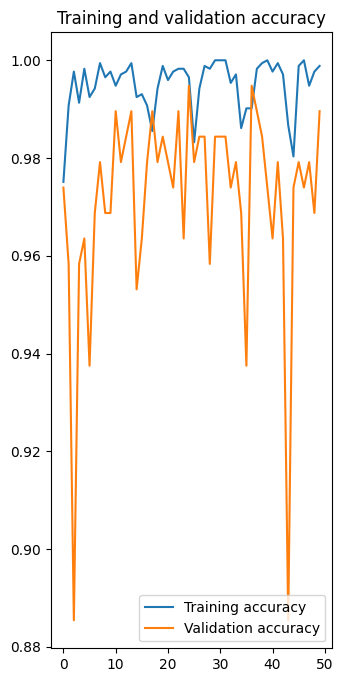

In [100]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Training accuracy')
plt.plot(range(EPOCHS),val_acc,label='Validation accuracy')
plt.legend(loc='lower right')
plt.title('Training and validation accuracy')

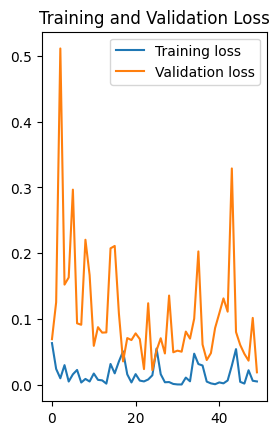

In [101]:
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss,label="Training loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label : Potato___Early_blight
1/1 [==============================] - 1s 1s/step
predicted label : Potato___Early_blight


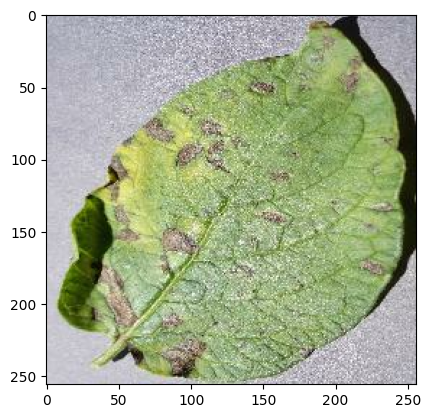

In [113]:
import numpy as np
for image_batch,label_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label :",class_names[first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label :",class_names[np.argmax(batch_prediction[0])])


In [114]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])),2)
    return predicted_class,confidence

1/1 [==============================] - 0s 48ms/step


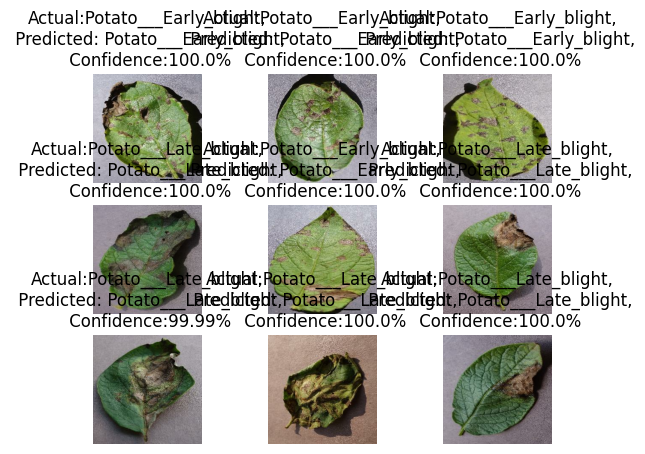

In [120]:
for images,labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class,confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted: {predicted_class},\n Confidence:{confidence}%")
        plt.axis("off")

In [123]:
model_version = 1
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/1\assets


INFO:tensorflow:Assets written to: ../models/1\assets
